## Project description

The goal of the project is to prepare market research based on open-source data on restaurants in LA for future investors, which is planned to attract, for opening a small robot-run cafe in Los Angeles. This cafe is promising but expensive. Investors are interested in the current market conditions—is it possible to maintain success when the novelty of robot waiters wears off?

## Table of contents

- [**STEP 1. General information and preprocessing data**](#first-step)
- [**STEP 2. Data analysis**](#second-step)
    - [2.1. Investigate the proportions of the various types of establishments. Plot a graph.](#types-proportions) 
    - [2.2. Investigate the proportions of chain and nonchain establishments. Plot a graph.](#chain-proportions) 
    - [2.3. Which type of establishment is typically a chain?](#chain-type)
    - [2.4. What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?](#characterize-of-chains)
    - [2.5. Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.¶](#average-number-of-seats) 
    - [2.6. Put the data on street names from the address column in a separate column.](#street-names)
    - [2.7. Plot a graph of the top ten streets by number of restaurants.](#top-ten-streets)
    - [2.8. Find the number of streets that only have one restaurant.](#one-restaurant)
    - [2.9. For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?](#distribution-of-seats)
- [**STEP 3. General conclusion**](#third-step)

## Step 1. General information and preparing the data <a id="first-step"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns


In [2]:
#reading the data
rest_data = pd.read_csv('rest_data_us.csv')
rest_data.head(10)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


In [3]:
#general information about data
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9648 non-null object
object_type    9651 non-null object
number         9651 non-null int64
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [4]:
#counting missing values
pd.isnull(rest_data).sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

According to the general information about data there are missing values in column "chain" (only three values are absent) and format of the column "chain" shoud be converted to boolean. 

In [5]:
#displayng rows with missing
rest_data[rest_data.isna().any(axis=1)]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


We did not find duplicate names for these restaurants, also if seek it in Google restaurants seems like single ones, so we can conclude that they are not chain restaurants and fill in the chain column with False.

In [6]:
#filling missing values
rest_data['chain'] = rest_data['chain'].fillna(value='False')
#converting the format from object to boolean
rest_data['chain'] = rest_data['chain'].astype(bool)
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9651 non-null bool
object_type    9651 non-null object
number         9651 non-null int64
dtypes: bool(1), int64(2), object(3)
memory usage: 386.5+ KB


In [7]:
# finding duplicates by the column "object_name"
rest_data['object_name'].duplicated().sum()

979

In [8]:
rest_data['object_name'].value_counts().head(10)

THE COFFEE BEAN & TEA LEAF    47
SUBWAY                        31
DOMINO'S PIZZA                15
KENTUCKY FRIED CHICKEN        14
WABA GRILL                    14
TRIMANA                       13
MCDONALD'S                    13
YOGURTLAND                    12
PAPA JOHN'S PIZZA             12
HONG KONG EXPRESS             12
Name: object_name, dtype: int64

In [9]:
#checking the duplicated numbers in column id
rest_data['id'].duplicated().sum()

0

There is no duplicated ids. And it seems that the number 979 shows chain restaurants, but not doubled data

In [10]:
#counting the amount of duplicate addresses
rest_data.duplicated(subset=['address']).sum()

1134

In [11]:
#displaying the rows with duplicated addresses
rest_data[rest_data.duplicated(subset=['address'])].head(20)

,id,object_name,address,chain,object_type,number
56,11842,LOTERIA GRILL SPACE 7C,700 WORLD WAY,False,Restaurant,17
62,11848,ROLLING STONE SPACE 7C,700 WORLD WAY,False,Restaurant,33
168,11954,HANNAM CHAIN SNACK BAR,2740 W OLYMPIC BLVD,False,Bar,20
170,11956,PEKING DUMPLING,2740 W OLYMPIC BLVD,False,Restaurant,8
283,12069,RALPHS MARKET #39,260 S LA BREA AVE,False,Restaurant,4
462,12248,TRADITIONS PUB,3607 TROUSDALE PKWY,False,Restaurant,197
469,12255,ROOFTOP CABANA @ MAMA SHELTER,6500 SELMA AVE,False,Restaurant,145
480,12266,PANDA EXPRESS,3607 TROUSDALE PKWY,False,Fast Food,40
576,12362,JONATHAN CLUB-BAKE SHOP,545 S FIGUEROA ST,False,Restaurant,5
579,12365,JONATHAN CLUB CAPE CODE,545 S FIGUEROA ST,False,Restaurant,64


The data contains matching addresses, or rather streets, but there may be more than one restaurant on the same street.

**CONCLUSION**

The dataframe consists of 6 columns and 9651 rows. There were found three missing values in column chain, which we filled with False. Also we converted the format of this column to boolean.

## Step 2. Data analysis <a id="second-step"></a>


### 2.1. Investigate the proportions of the various types of establishments. Plot a graph. <a id="second-step"></a>

In [12]:
#counting the amount of establishments by type
rest_data.groupby('object_type')['id'].count().sort_values()

object_type
Bakery         283
Bar            292
Pizza          320
Cafe           435
Fast Food     1066
Restaurant    7255
Name: id, dtype: int64

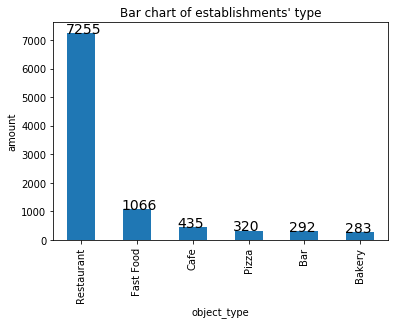

In [13]:
#ploting bar chart
ax = rest_data.groupby('object_type')['id'].count().sort_values(ascending=False).plot(kind='bar', title='Bar chart of establishments\' type')

# create a list to collect the plt.patches data
totals = []

#find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(int(i.get_height())), fontsize=14,
                color='black')
    
plt.ylabel('amount')
plt.show()

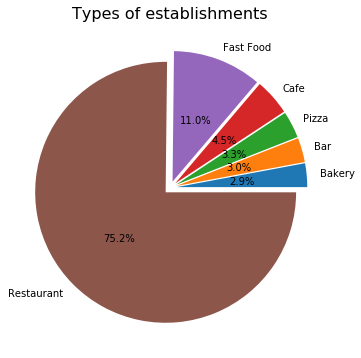

In [14]:
rest_data_object_types_pie = rest_data.groupby('object_type')['id'].count().sort_values()
#plotting pie chart
pie, ax = plt.subplots(figsize=[10,6])
labels = rest_data_object_types_pie.keys()
plt.pie(x=rest_data_object_types_pie, autopct="%.1f%%", explode=[0.05]*6, labels=labels, pctdistance=0.5)
plt.title("Types of establishments", fontsize=16);



Huge part of all establisments belongs to restaurants - 75.2%. Other's parts vary from 3% to 11%.

The evidence that most of the establishments in Los Angeles are restaurants can be attributed to the fact that Los Angeles is considered the gastronomic capital of America. Fresh food, good weather, the ocean and the eminent audience in the face of Hollywood stars - all this makes the choice in favor of the restaurant.

### 2.2. Investigate the proportions of chain and nonchain establishments. Plot a graph. <a id="chain-proportions"></a>

In [15]:
#finding the amount of chain and nonchain establishments
rest_data_chain = rest_data.groupby('chain')['id'].count()
rest_data_chain

chain
False    5972
True     3679
Name: id, dtype: int64

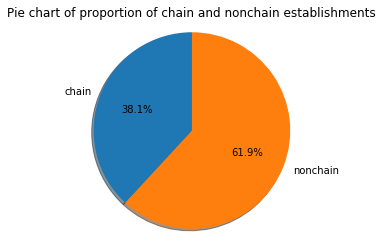

In [16]:
# plotting pie chart
labels = 'chain', 'nonchain'
sizes = [3679, 5972]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Pie chart of proportion of chain and nonchain establishments')
plt.show()


We can see that share of nonchain establishments is bigger than chain. It looks logicaly because on the previous step we found that the most establishments are restaurants

Los Angeles is a unique city and perhaps every restaurant owner strives to create a unique establishment. Again, most likely Hollywood stars prefer gourmet restaurants over chain restaurants. 

### 2.3. Which type of establishment is typically a chain? <a id="chain-type"></a>

In [17]:
#counting chain and nonchain establishments by type
rest_data.groupby(['chain', 'object_type'])['id'].count()

chain  object_type
False  Bar             215
       Cafe            169
       Fast Food       461
       Pizza           166
       Restaurant     4961
True   Bakery          283
       Bar              77
       Cafe            266
       Fast Food       605
       Pizza           154
       Restaurant     2294
Name: id, dtype: int64

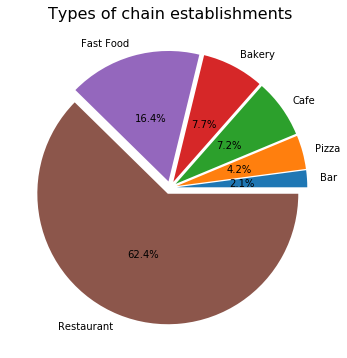

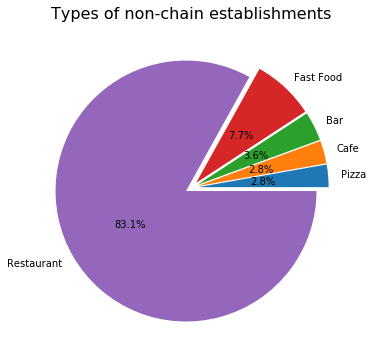

In [18]:
rest_data_chain_object_types_pie = rest_data.query('chain == True').groupby('object_type')['id'].count().sort_values()
#plotting pie chart
pie, ax = plt.subplots(figsize=[10,6])
labels = rest_data_chain_object_types_pie.keys()
plt.pie(x=rest_data_chain_object_types_pie, autopct="%.1f%%", explode=[0.05]*6, labels=labels, pctdistance=0.5)
plt.title("Types of chain establishments", fontsize=16);

rest_data_nonchain_object_types_pie = rest_data.query('chain == False').groupby('object_type')['id'].count().sort_values()
#plotting pie chart
pie, ax = plt.subplots(figsize=[10,6])
labels = rest_data_nonchain_object_types_pie.keys()
plt.pie(x=rest_data_nonchain_object_types_pie, autopct="%.1f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Types of non-chain establishments", fontsize=16);

We can see that in our data only bakery always is chain.

These pie charts confirm our previous findings that the majority of establishments are non-chain and these are restaurants. Restaurants make up 83.1% of all non-chain establishments. Among chain establishments, the share of restaurants is also high, but lower than among nonchain establishments, namely 62.4%. After restaurants, fast food accounts for a substantial share of chain establishments - 16.4%. All over the world there are a number of well-known and quite significant fast food chains such as McDonald's, Subway, Pizza Hut and others. At the same time, among non-chain establishments, fast food accounts for only 7.7%. Among chain and non-chain establishments with different proportions, but the first two places are confidently occupied by restaurants (1) and fast food (2). Further, the comparative order of establishments changes. Among the chain establishments alone, there are bakeries - 7.7%. After followed by cafes - 7.2% and a small percentage of pizzerias and bars. Сonsidering chain establishments, after fast food, bars, cafes and pizzerias follow, occupying an average share of 3%.

### 2.4. What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats? <a id="characterize-of-chains"></a>

In [19]:
rest_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [20]:
chain_rest = rest_data.query('chain == True').groupby('object_name').agg({'id': pd.Series.count, 'number': pd.Series.mean})
chain_rest = chain_rest.sort_values(by='id', ascending=False)
chain_rest.head(50)

,id,number
object_name,,
THE COFFEE BEAN & TEA LEAF,47,26.723404
SUBWAY,31,16.419355
DOMINO'S PIZZA,15,12.333333
KENTUCKY FRIED CHICKEN,14,33.357143
WABA GRILL,14,42.857143
MCDONALD'S,13,96.846154
TRIMANA,13,43.461538
YOGURTLAND,12,16.416667
HONG KONG EXPRESS,12,18.583333


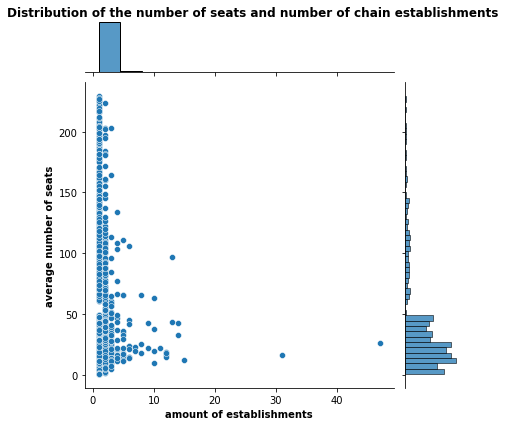

In [21]:
p = sns.jointplot(x='id', y='number', data=chain_rest, kind='scatter')
p.ax_joint.set_xlabel('amount of establishments', fontweight='bold')
p.ax_joint.set_ylabel('average number of seats', fontweight='bold')
p.fig.suptitle("Distribution of the number of seats and number of chain establishments", fontweight='bold')
p.fig.subplots_adjust(top=0.95)
plt.show()



On the graph, we can see that the chains in which a small number of establishments have a range of seats from 1 to more than 200. At the same time, chains in which more than 10 establishments do not have more than 100 seats and in especially large networks there are no more than 50 seats.

### 2.5. Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs. <a id="average-number-of-seats"></a>

In [22]:
rest_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [23]:
rest_data.groupby('object_type')['number'].mean().sort_values().round()

object_type
Bakery        22.0
Cafe          25.0
Pizza         28.0
Fast Food     32.0
Bar           45.0
Restaurant    48.0
Name: number, dtype: float64

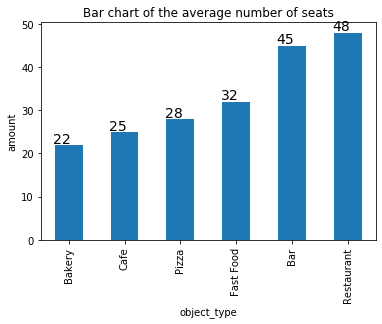

In [24]:
#ploting bar chart
rest_average_seats = rest_data.groupby('object_type')['number'].mean().sort_values().round().plot(kind='bar', title='Bar chart of the average number of seats')

# create a list to collect the plt.patches data
totals = []

#find the values and append to list
for i in rest_average_seats.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in rest_average_seats.patches:
    # get_x pulls left or right; get_height pushes up or down
    rest_average_seats.text(i.get_x()-.03, i.get_height()+.5, \
            str(int(i.get_height())), fontsize=14,
                color='black')
    
plt.ylabel('amount')
plt.show()

On average the greatest number of seats is in the restaurants.

 Bars ranked second with a similar average number of seats (45 versus 48 in restaurants). It can be assumed that this is due to the fact that people spend relatively more time in restaurants and bars and gather in companies. Fast food is in third place with a significantly lower average number of seats (32). For fast food, a smaller number of seats is enough, because mostly people come to have a quick snack or eat a business lunch, which is always limited in time. This frees up space quickly. Pizzeria performance is comparable to fast food establishments - with an average of 28 seats, for the same reasons. And besides, pizza is often ordered to take away. The smallest number of seats in cafes and bakeries - an average 25  and 22 accordingly. This is most likely due to the fact that the format of these establishments involves small premises. In addition, people often take coffee and pastries with them and they do not need a seat at all.

### 2.6. Put the data on street names from the address column in a separate column. <a id="street-names"></a>

In [25]:
rest_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [26]:
rest_data['street'] = rest_data['address'].str.split(n=1, expand=True)[1].str.split(' #', n=1, expand=True)[0]

import re
rest_data['street'] = rest_data['street'].str.split(r' \d+[^A-Z]', n=1, expand=True)[0]
rest_data.head(10)

,id,object_name,address,chain,object_type,number,street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14,NATIONAL BLVD
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100,WORLD WAY
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7,W 6TH ST STE
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1,N SAN FERNANDO RD UNIT
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35,N CAHUENGA BLVD


In [27]:
# making all letters in object_name uppercase
rest_data['street'] = rest_data['street'].str.upper()

Now we have a new column 'street' in dataframe rest_data, which contains the name of the street.

### 2.7. Plot a graph of the top ten streets by number of restaurants. <a id="top-ten-streets"></a>


In [28]:
rest_street_count = rest_data.groupby('street')['id'].count().sort_values().nlargest(10)
rest_street_count = rest_street_count.reset_index()
rest_street_count

,street,id
0,W SUNSET BLVD,320
1,W PICO BLVD,312
2,WILSHIRE BLVD,246
3,SANTA MONICA BLVD,211
4,S WESTERN AVE,205
5,HOLLYWOOD BLVD,204
6,W 3RD ST,182
7,S FIGUEROA ST,180
8,S VERMONT AVE,174
9,W OLYMPIC BLVD,162


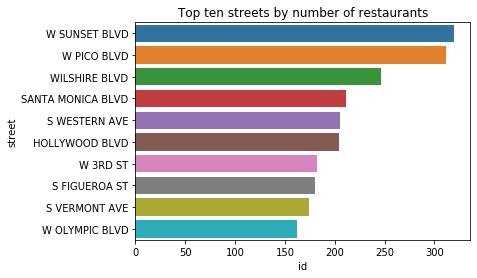

In [29]:
top_ten_streets = sns.barplot(x="id", y="street", data=rest_street_count)

top_ten_streets.set_title('Top ten streets by number of restaurants')
plt.show()


The most famous street with the largest number of establishments is W SUNSET BLVD. W PICO BLVD follows immediately. Each of them has over 300 restaurants.

 The presence of a large number of establishments on the street is more dependent on the central location of the tourist area, in Hollywood. In addition, the length of the street plays a role. W SUNSET BLVD, for example, is about 35 kilometers long and runs through areas such as Beverly Hills and Hollywood, by far the largest number of establishments.

### 2.8. Find the number of streets that only have one restaurant. <a id="one-restaurant"></a>

In [30]:
number_of_rest = rest_data['street'].value_counts().reset_index()
number_of_rest.tail()

,index,street
1377,PARK TER,1
1378,1/2 LA BREA AVE,1
1379,E 2ND ST UNIT C,1
1380,W 6TH ST BM,1
1381,S FAIRFAX AVE A14,1


In [31]:
#slicing data for the streets which have only one restaurant
number_of_rest_one = number_of_rest.query('street == 1')['index'].count()
print('The number of streets that only have one restaurant: {:}'.format(int(number_of_rest_one)))

The number of streets that only have one restaurant: 828


Most likely, only one establishment is located on the street, because this is either not the central street, perhaps a sleeping area, or a highway, on which there can be a maximum of a cafe at a gas station. 

### 2.9. For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see? <a id="distribution-of-seats"></a>

In [32]:
#counting number of restaurants by the street and average numbeer of seats
destribution_number_of_seats = rest_data.groupby('street').agg(
    {'id': 'count', 'number': 'mean'}
)
destribution_number_of_seats_top_ten = destribution_number_of_seats.sort_values(by='id', ascending=False).head(10)
destribution_number_of_seats_top_ten

,id,number
street,,
W SUNSET BLVD,320,49.981250
W PICO BLVD,312,40.006410
WILSHIRE BLVD,246,54.849593
SANTA MONICA BLVD,211,35.127962
S WESTERN AVE,205,42.453659
HOLLYWOOD BLVD,204,57.220588
W 3RD ST,182,41.434066
S FIGUEROA ST,180,48.605556
S VERMONT AVE,174,45.218391


In [33]:
destribution_number_of_seats_top_ten['number'].mean()

46.8329573669184

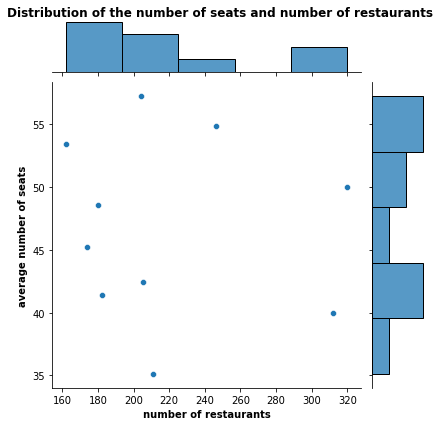

In [34]:
h = sns.jointplot(x="id", y="number", data=destribution_number_of_seats_top_ten)
h.ax_joint.set_xlabel('number of restaurants', fontweight='bold')
h.ax_joint.set_ylabel('average number of seats', fontweight='bold')
h.fig.suptitle("Distribution of the number of seats and number of restaurants", fontweight='bold')
h.fig.subplots_adjust(top=0.95)
plt.show()

On the streets with the largest number of restaurants (320 and 312), there are on average 50 and 40 seats, respectively. On streets with fewer restaurants - from 160 to 260, the average number of seats in an establishment varies from 35 to 55. 

In general, we can conclude that the number of seats on the streets with the largest number of establishments on average varies from 40 to 50.

## Step 3. General conclusion <a id="third-step"></a>

Restaurants are the main type among all establishments, their share is more than 75 percent. 

In addition, the share of non-chain establishments is significantly higher than chain ones. 

Besides there is a tendency: the larger the chain, the fewer seats in each individual establishment of this chain. 

On average, the largest number of seats is again in restaurants. 

The study showed that the most popular streets in Los Angeles are W SUNSET BLVD and W PICO BLVD. 

At the same time, there is a fairly large number of streets with only 1 restaurant (828).

In terms of the number of seats on average, the most popular streets range from 40 to 50. 

On the one hand, the popular streets are likely to be the most visited. But at the same time, there is enormous competition. Perhaps it should take a closer look at streets with a small number of restaurants, but at the same time learn from the experience of "successful" streets, namely, a non-chain establishment with 40 to 50 seats.

As a result of the analysis, the general recommendation is to pay attention to the following format of the establishment: 
- a small non-chain restaurant, 
- the number of seats is not more than 50, 
- on the street where there is no large concentration of restaurants.

Presentation: https://drive.google.com/file/d/1aNZBMk8NMyufnSe_F-ET-qthXFqk9OCo/view?usp=sharing